In [13]:
#library
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import *

In [9]:
data = pd.read_excel('https://storage.googleapis.com/dqlab-dataset/credit_scoring_dqlab.xlsx')
data_feed = data.drop(["kpr_aktif","kode_kontrak", "pendapatan_setahun_juta", "risk_rating", "rata_rata_overdue"], axis=1)

In [11]:
labelencoder = LabelEncoder()
labels = labelencoder.fit_transform(data['risk_rating'])

In [14]:
##SEED
SEED = 2022

In [15]:
##Data Split
X_train, X_test, Y_train, Y_test = train_test_split(data_feed, labels, test_size = 0.20, 
                                                      random_state = SEED)

In [16]:
print('Ukuran X Train:', X_train.shape)
print('Ukuran Y Train:', Y_train.shape)
print('Ukuran X Test:', X_test.shape)
print('Ukuran Y Test:', Y_test.shape)

Ukuran X Train: (720, 2)
Ukuran Y Train: (720,)
Ukuran X Test: (180, 2)
Ukuran Y Test: (180,)


In [23]:
from sklearn import tree
from sklearn.tree import export_text

In [27]:
risk_rating_model = tree.DecisionTreeClassifier()
risk_rating_model.fit(X_train, Y_train)
r = export_text(risk_rating_model)
print(r)

|--- feature_1 <= 4.50
|   |--- feature_1 <= 2.50
|   |   |--- feature_0 <= 42.00
|   |   |   |--- feature_0 <= 30.00
|   |   |   |   |--- feature_1 <= 1.50
|   |   |   |   |   |--- feature_1 <= 0.50
|   |   |   |   |   |   |--- feature_0 <= 18.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_0 >  18.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_1 >  0.50
|   |   |   |   |   |   |--- feature_0 <= 18.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_0 >  18.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_1 >  1.50
|   |   |   |   |   |--- feature_0 <= 18.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_0 >  18.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  30.00
|   |   |   |   |--- feature_1 <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_1 >  0.50
|   |   |   |   |   |--- feature_1 <= 1.50
|  

[Text(0.6190159574468085, 0.9375, 'X[1] <= 4.5\ngini = 0.771\nsamples = 720\nvalue = [178, 126, 234, 97, 85]'),
 Text(0.40824468085106386, 0.8125, 'X[1] <= 2.5\ngini = 0.64\nsamples = 514\nvalue = [169, 109, 234, 2, 0]'),
 Text(0.2579787234042553, 0.6875, 'X[0] <= 42.0\ngini = 0.609\nsamples = 316\nvalue = [164, 96, 54, 2, 0]'),
 Text(0.19680851063829788, 0.5625, 'X[0] <= 30.0\ngini = 0.411\nsamples = 228\nvalue = [162, 66, 0, 0, 0]'),
 Text(0.13829787234042554, 0.4375, 'X[1] <= 1.5\ngini = 0.308\nsamples = 163\nvalue = [132, 31, 0, 0, 0]'),
 Text(0.0851063829787234, 0.3125, 'X[1] <= 0.5\ngini = 0.341\nsamples = 110\nvalue = [86, 24, 0, 0, 0]'),
 Text(0.0425531914893617, 0.1875, 'X[0] <= 18.0\ngini = 0.312\nsamples = 62\nvalue = [50, 12, 0, 0, 0]'),
 Text(0.02127659574468085, 0.0625, 'gini = 0.404\nsamples = 32\nvalue = [23, 9, 0, 0, 0]'),
 Text(0.06382978723404255, 0.0625, 'gini = 0.18\nsamples = 30\nvalue = [27, 3, 0, 0, 0]'),
 Text(0.1276595744680851, 0.1875, 'X[0] <= 18.0\ngini = 0

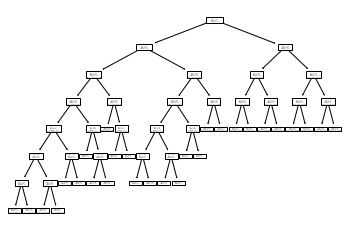

In [28]:
tree.plot_tree(risk_rating_model)

In [29]:
hasil = risk_rating_model.predict(X_test)

array([2, 2, 2, 2, 2, 2, 2, 3, 2, 1, 0, 1, 2, 2, 0, 2, 1, 0, 0, 2, 1, 2,
       0, 0, 2, 4, 3, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 4, 2, 4, 3, 2, 2, 0,
       2, 0, 0, 2, 3, 4, 2, 0, 4, 2, 4, 2, 0, 2, 3, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 2, 4, 4, 3, 1, 2, 0, 2, 0, 0, 2, 4, 0, 3, 2, 2, 4, 4, 0, 2,
       4, 1, 4, 2, 2, 1, 1, 0, 1, 2, 0, 2, 4, 2, 0, 0, 4, 0, 2, 2, 2, 0,
       0, 1, 3, 1, 2, 2, 3, 4, 4, 4, 2, 3, 1, 3, 0, 3, 3, 0, 0, 3, 2, 2,
       2, 0, 0, 1, 1, 2, 2, 4, 1, 2, 4, 4, 2, 3, 1, 3, 0, 2, 2, 0, 0, 1,
       3, 1, 2, 0, 2, 0, 0, 4, 3, 3, 0, 0, 4, 0, 1, 3, 1, 0, 0, 2, 2, 4,
       1, 4, 2, 4])

In [31]:
from sklearn.metrics import *

In [33]:
confusion_matrix(Y_test, hasil)

array([[36, 10,  0,  2,  1],
       [14, 13,  4,  0,  2],
       [ 0,  1, 56,  0,  0],
       [ 0,  0,  0, 15,  8],
       [ 0,  0,  0,  3, 15]])

In [34]:
 accuracy_score(Y_test, hasil)

0.75